In [1]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords 
from collections import Counter
import re
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 24, 24


[nltk_data] Downloading package punkt to /home/ajitesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ajitesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def pre_process_txt(filename):
    '''Reads the text file to a string and preprocesses the text file
    by lowercasing, removing newlines, punctuation, chapter headers, 
    numbers and ordinal dates and does tokenization. Also removes stopwords'''
    f_s=open(filename)
    book=""
    for line in f_s:
        book+=line
    book=book.replace("\n"," ")
    book=book.lower()
    for char in string.punctuation:
        book=book.replace(char,"")
    remove_chap="[cC]hapter [0-9]+"
    remove_nums="[0-9]+"
    remove_suffixes="(^|\s)+th\s+|(^|\s)+rd\s+|(^|\s)+nd\s+|(^|\s)+st\s+"
    book=re.sub(remove_chap,'',book)
    book=re.sub(remove_nums,'',book)
    book=re.sub(remove_suffixes,' ',book)
    book=book.replace('“',"")
    book=book.replace('”',"")
    book=book.replace('‘',"")
    book=book.replace('’',"")
    book=book.replace('—'," ")
    return book

In [3]:
def tokenify_rem_stop(book):
    '''Performs tokenization on the preprocessed
    text file and removes stopwords'''
    stop_words=set(stopwords.words('english')) 
    words=word_tokenize(book)
    words=[w for w in words if not w in stop_words]
    return words 

In [4]:
def tokenify(book):
    '''Performs tokenization on the preprocessed
    text file without removing stopwords'''
    words=word_tokenize(book)
    return words 

In [5]:
def freq_dist(tokens,ax,st):
    '''Plots a frequency distribution of the tokens
    in the form of a bar graph'''
    count=Counter(tokens)
    for_graph=Counter(tokens).most_common(30)
    graph_dict={}
    for i in for_graph:
        graph_dict[i[0]]=i[1]
        
    
    ax.bar(graph_dict.keys(),graph_dict.values())
    ax.set_ylabel("Frequency of Words", fontsize=10)
    ax.set_title("Frequency of 30 most occuring words "+st, fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    print("Number of unique tokens "+st+":",len(count))
    return count
    

In [6]:
def word_cloud(counts,axes,st):
    '''Makes a word cloud from the given text'''
    wordcloud=WordCloud(width=1000,height=800).fit_words(counts)
    axes.axis('off')
    axes.set_title(st,fontsize=20)
    axes.imshow(wordcloud)
    
    

In [7]:
def do_all(txt):
    '''Does preprocessing, tokenization, word cloud formation and plots frequency
    distribution of top 30 most common words for a given text file'''
    fig,axes=plt.subplots(ncols=2,nrows=2)
    book1=pre_process_txt(txt)
    tb_1=tokenify(book1)
    c1_a=freq_dist(tb_1,axes[0,0],"with stopwords")
    word_cloud(c1_a,axes[0,1],"Stopwords Included")
    tbs_1=tokenify_rem_stop(book1)
    c1_b=freq_dist(tbs_1,axes[1,0],"without stopwords")
    word_cloud(c1_b,axes[1,1],"Stopwords Excluded")

Number of unique tokens with stopwords: 7357
Number of unique tokens without stopwords: 7228


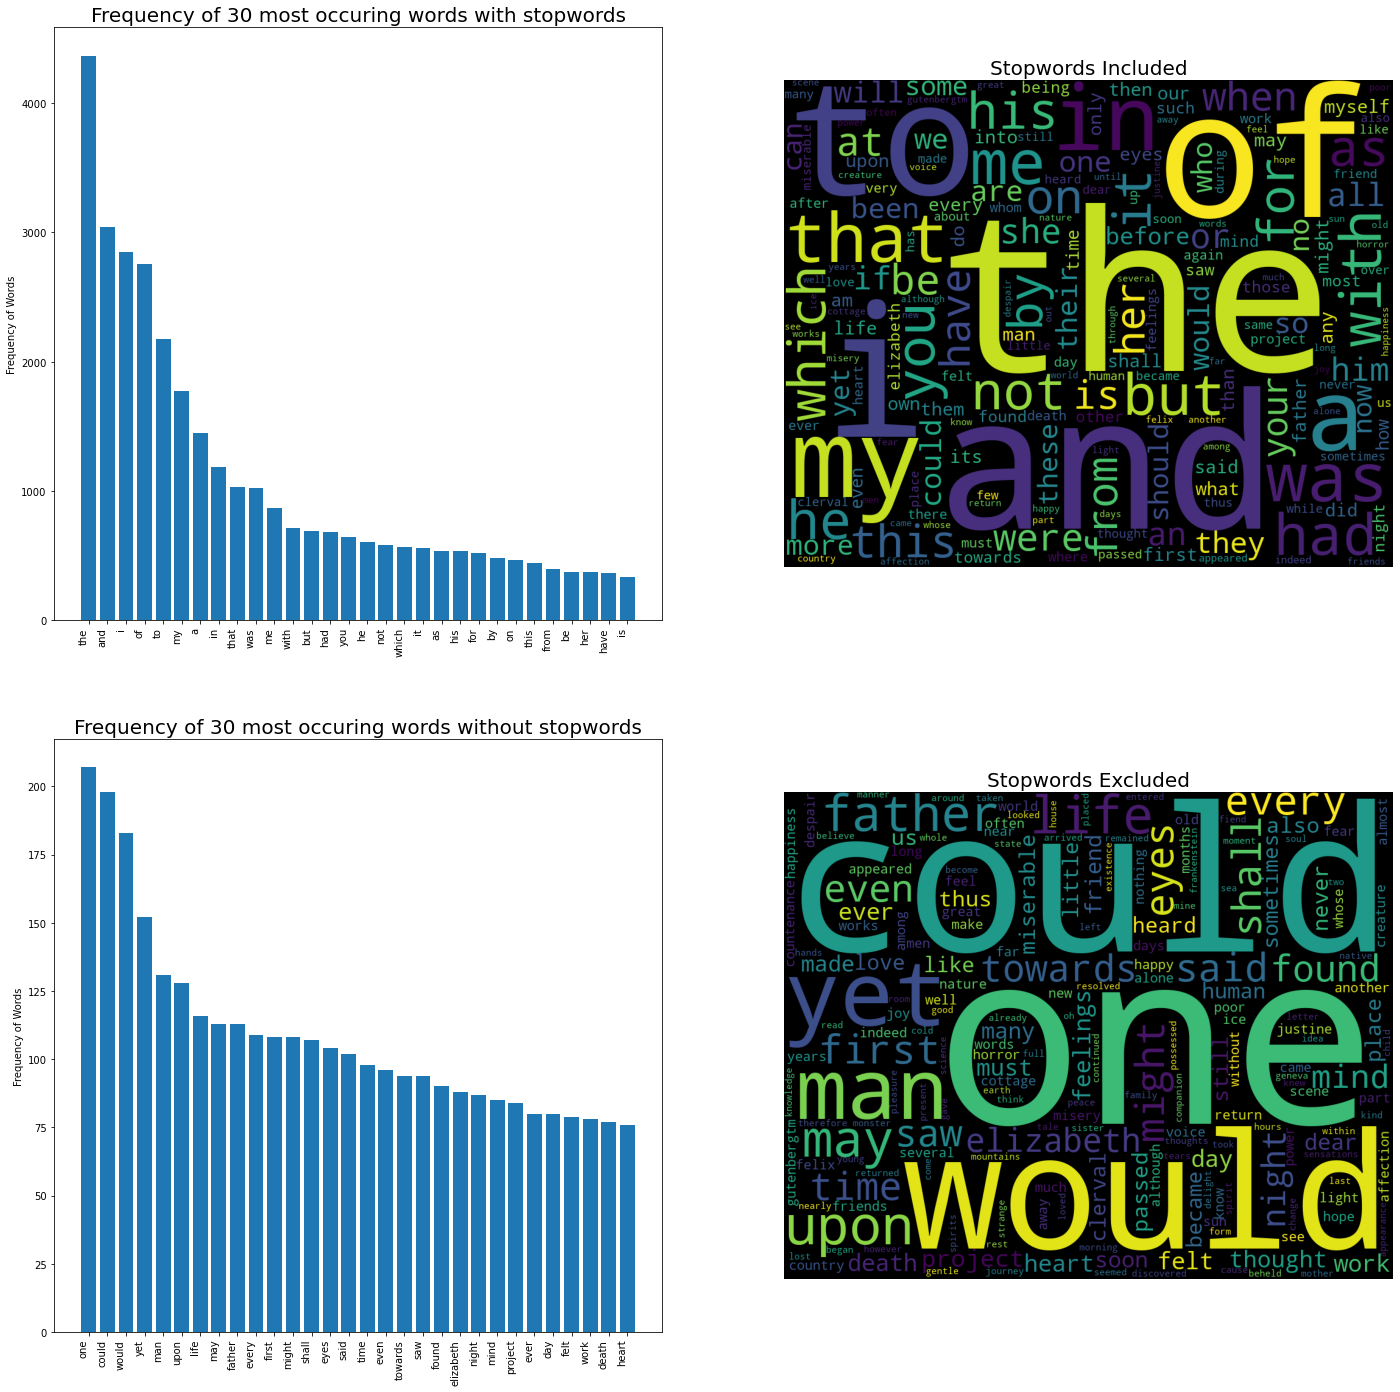

In [8]:
do_all("Frankenstein.txt")

Number of unique tokens with stopwords: 6967
Number of unique tokens without stopwords: 6840


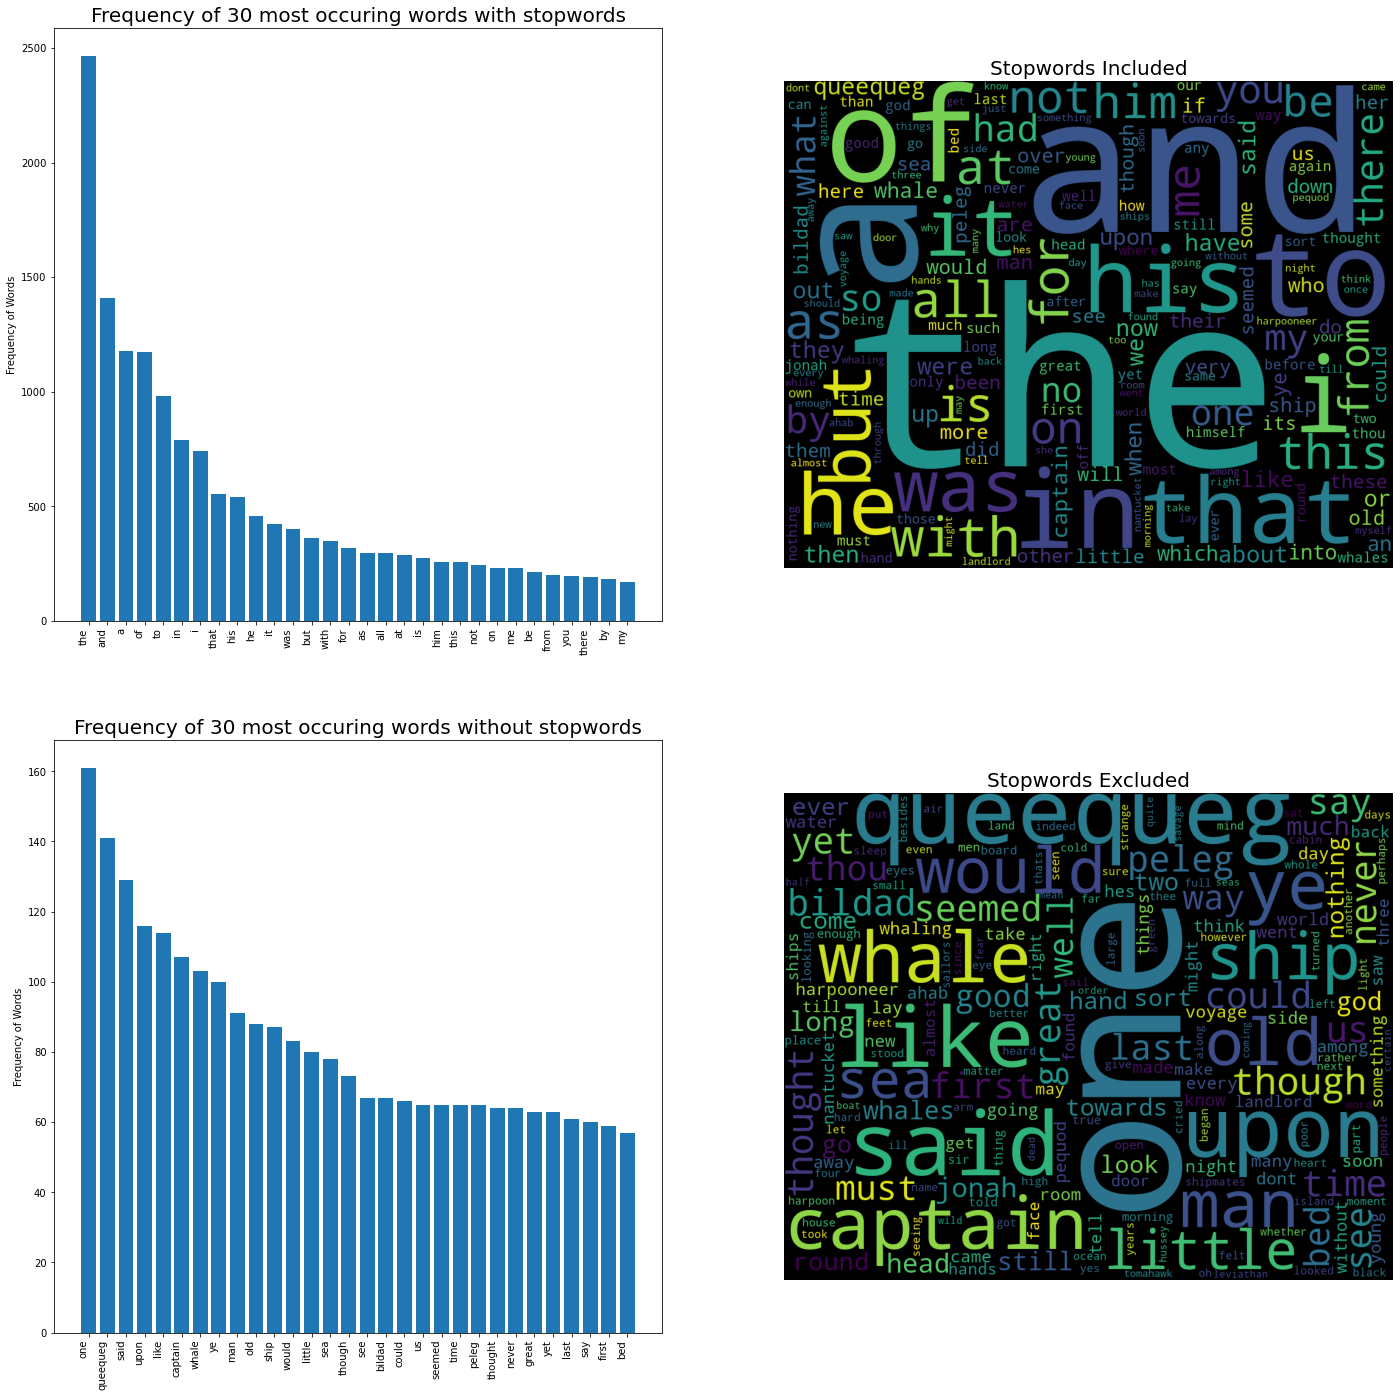

In [9]:
do_all("Moby Dick.txt")

In [10]:
def POS_tagging(txt):
    '''Does POS tagging using Brown corpus after removing table of 
    contents and page numbers and chapter numbers from the text'''
    f_in=open(txt)
    book=""
    for line in f_in:
        book+=line
    
    remove_chap="[cC]hapter [0-9]+"
    remove_nums="[0-9]+"
    book=re.sub(remove_chap,'',book)
    book=re.sub(remove_nums,'',book)
    
    tokenized = sent_tokenize(book)
    concat_lists = []
    for w in tokenized:
        words = nltk.word_tokenize(w)
        tagged = nltk.pos_tag(words)
        concat_lists += tagged

    tags = [w[1] for w in concat_lists if w[1].isalpha()]
    
    return tags

In [11]:
def dist_of_tags(tags):
    '''This function counts frequency of different POS tags and plots 
    frequency distribution of tags'''
    tagCounter = Counter(tags)
    fig, ax = plt.subplots(figsize=(20, 10))
    
    tags = tagCounter.keys()
    count = tagCounter.values()
    
    ax.bar(tags,count,color = 'green')
    ax.set_title("Frequency of various tags",fontsize = 20)
    ax.set_ylabel("Number of occurence",fontsize = 20)
    ax.set_xlabel("Tags",fontsize = 20)

In [12]:
def tag_n_analyse(txt):
    '''This function does POS tagging and analyse distribution of 
    various tags in the text'''
    tags = POS_tagging(txt)
    dist_of_tags(tags)

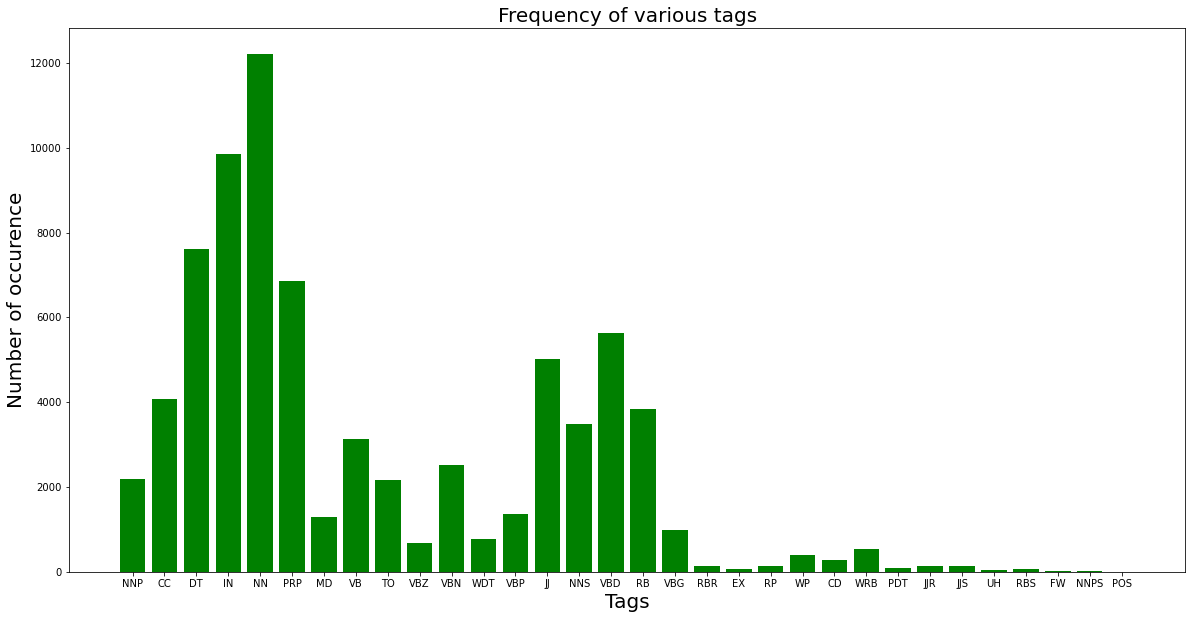

In [13]:
 tag_n_analyse("Frankenstein.txt")

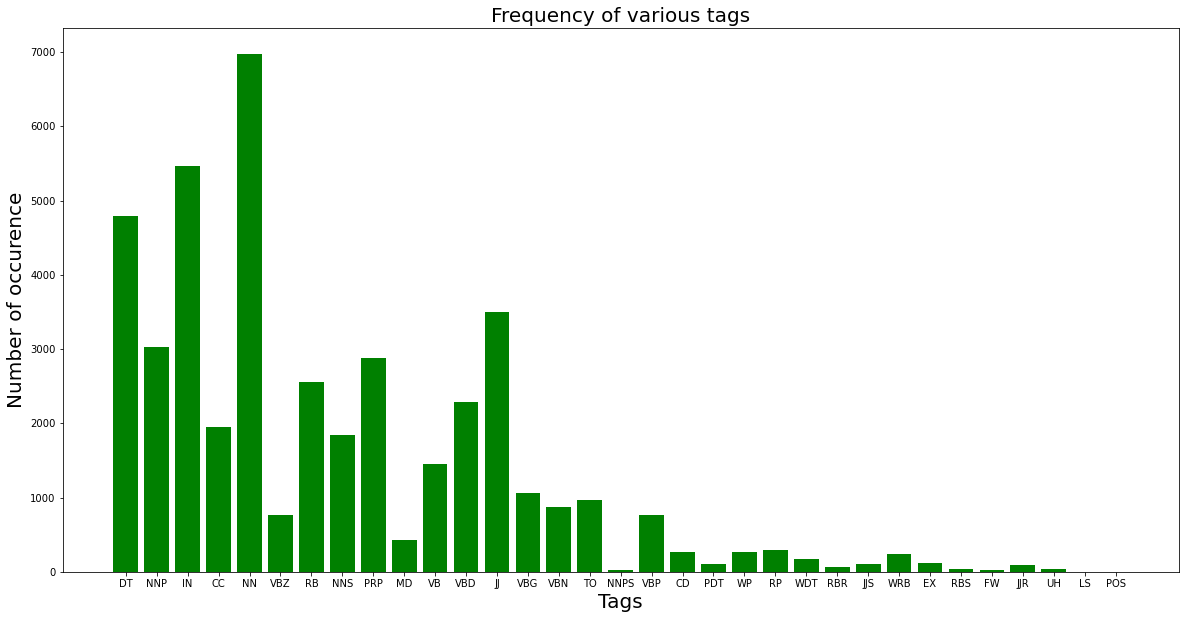

In [14]:
 tag_n_analyse("Moby Dick.txt")